In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [95]:
df = {}

for i in range(2010, 2022):
    df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
    df[i].drop(labels=df[i][df[i]['아내지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['남편지역코드'] > 39].index, inplace=True)
    df[i].drop(labels=df[i][df[i]['아내직업코드'] == 99].index, inplace=True)

C:\Users\science7\AppData\Local\Temp\ipykernel_4792\3438226185.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_4792\3438226185.py:4: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_4792\3438226185.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")
C:\Users\science7\AppData\Local\Temp\ipykernel_4792\3438226185.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df[i] = pd.read_csv("../data/csv_in_" + str(i) + ".csv")


In [105]:
for year in range(2010, 2022):
    df[year].loc[df[year]['남편연령'] > df[year]['아내연령'], "결혼 연령차 유형"] = "남성 연상혼" 
    df[year].loc[df[year]['남편연령'] < df[year]['아내연령'], "결혼 연령차 유형"] = "여성 연상혼" 
    df[year].loc[df[year]['남편연령'].astype(int) == df[year]['아내연령'].astype(int), "결혼 연령차 유형"] = "동갑혼" 

    df[year].loc[df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 기준 대도시 유무"] = "대도시 거주" 
    df[year].loc[~df[year]['아내지역코드'].isin([11, 21, 22, 23, 24, 25]), "아내 기준 대도시 유무"] = "대도시 비거주" 

    df[year].loc[df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 기준 대도시 유무"] = "대도시 거주" 
    df[year].loc[~df[year]['남편지역코드'].isin([11, 21, 22, 23, 24, 25]), "남편 기준 대도시 유무"] = "대도시 비거주" 
    
    df[year].loc[df[year]["결혼 연령차 유형"] == "여성 연상혼" , "강혼 여부"] = 1
    df[year].loc[~(df[year]["결혼 연령차 유형"] == "여성 연상혼"), "강혼 여부"] = 0

    #여성 대도시 거주 유무와 결혼 연령차 유형 연관성 높음

In [106]:
df[2010]

,신고연도,신고월,신고일,남편지역코드,아내지역코드,실제결혼연도,실제결혼월,남편직업코드,아내직업코드,남편교육코드,...,남편연령,아내연령,남편국적구분코드,남편국적코드,아내국적구분코드,아내국적코드,결혼 연령차 유형,아내 기준 대도시 유무,남편 기준 대도시 유무,강혼 여부
0,2010,12,24,38,38,2010,10,3,3,5,...,32.679,30.490,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0
1,2010,12,28,31,11,2010,12,5,13,3,...,28.030,28.723,1.0,NaN,1.0,NaN,동갑혼,대도시 거주,대도시 비거주,0
2,2010,12,28,26,26,2010,9,3,13,5,...,29.400,28.556,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0
3,2010,12,24,38,38,2010,10,3,13,5,...,29.671,26.150,1.0,NaN,1.0,NaN,남성 연상혼,대도시 비거주,대도시 비거주,0
4,2010,12,28,26,26,2010,9,7,2,5,...,28.991,28.526,1.0,NaN,1.0,NaN,동갑혼,대도시 비거주,대도시 비거주,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326601,2010,8,5,11,11,2010,6,3,3,6,...,34.435,27.871,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0
326602,2010,11,17,24,24,2010,10,3,3,5,...,34.728,30.904,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0
326603,2010,8,5,11,11,2010,4,7,13,5,...,26.424,29.517,1.0,NaN,1.0,NaN,여성 연상혼,대도시 거주,대도시 거주,1
326604,2010,7,8,11,11,2010,7,3,3,5,...,30.361,29.597,1.0,NaN,1.0,NaN,남성 연상혼,대도시 거주,대도시 거주,0


In [107]:
crosstab_years = {}




for year in range(2010, 2022):
    crosstab_years[year] = pd.crosstab(df[year]['남편 기준 대도시 유무'], df[year]['결혼 연령차 유형'], margins=True)

In [108]:


c, p, dof, expected = scipy.stats.chi2_contingency(crosstab_years[2018])

In [109]:
print("c-val : " + str(c))
print("P-val : " + str(p))
print("c\dof : " + str(dof) )

c-val : 37.345877320908684
P-val : 1.5075611896632631e-06
c\dof : 6


### 강혼 / 소득 관계

c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45236 (\N{HANGUL SYLLABLE NAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51649 (\N{HANGUL SYLLABLE JIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\science7\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\p

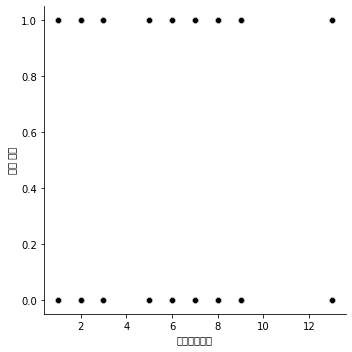

In [117]:
sns.relplot(data = df[2020],
              x='아내직업코드', y='강혼 여부', 
              
              color = 'black')